### Retail - Capstone Project PGP

DESCRIPTION

Problem Statement
It is a critical requirement for business to understand the value derived from a customer. RFM is a method used for analyzing customer value.
Customer segmentation is the practice of segregating the customer base into groups of individuals based on some common characteristics such as age, gender, interests, and spending habits
Perform customer segmentation using RFM analysis. The resulting segments can be ordered from most valuable (highest recency, frequency, and value) to least valuable (lowest recency, frequency, and value).
Dataset Description
This is a transnational data set which contains all the transactions that occurred between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique and all-occasion gifts.

Variables	Description
InvoiceNo	Invoice number. Nominal, a six digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation
StockCode	Product (item) code. Nominal, a five digit integral number uniquely assigned to each distinct product
Description	Product (item) name. Nominal
Quantity	The quantities of each product (item) per transaction. Numeric
InvoiceDate	Invoice Date and time. Numeric, the day and time when each transaction was generated
UnitPrice	Unit price. Numeric, product price per unit in sterling
CustomerID	Customer number. Nominal, a six digit integral number uniquely assigned to each customer
Country	Country name. Nominal, the name of the country where each customer resides


#### Importing libraries

In [37]:
# import library
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime as dt

#For Data  Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#For Machine Learning Algorithm
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

#### Weekly Project details

Project Task: Week 1
Data Cleaning:

1. Perform a preliminary data inspection and data cleaning.

a. Check for missing data and formulate an apt strategy to treat them.

b. Remove duplicate data records.

c. Perform descriptive analytics on the given data.

Data Transformation:

2. Perform cohort analysis (a cohort is a group of subjects that share a defining characteristic). Observe how a cohort behaves across time and compare it to other cohorts.

a. Create month cohorts and analyze active customers for each cohort.

b. Analyze the retention rate of customers.



Project Task: Week 2
Data Modeling :

1. Build a RFM (Recency Frequency Monetary) model. Recency means the number of days since a customer made the last purchase. Frequency is the number of purchase in a given period. It could be 3 months, 6 months or 1 year. Monetary is the total amount of money a customer spent in that given period. Therefore, big spenders will be differentiated among other customers such as MVP (Minimum Viable Product) or VIP.

2. Calculate RFM metrics.

3. Build RFM Segments. Give recency, frequency, and monetary scores individually by dividing them into quartiles.

b1. Combine three ratings to get a RFM segment (as strings).

b2. Get the RFM score by adding up the three ratings.

b3. Analyze the RFM segments by summarizing them and comment on the findings.

Note: Rate “recency" for customer who has been active more recently higher than the less recent customer, because each company wants its customers to be recent.

Note: Rate “frequency" and “monetary" higher, because the company wants the customer to visit more often and spend more money

Project Task: Week 3
Data Modeling :

1. Create clusters using k-means clustering algorithm.

a. Prepare the data for the algorithm. If the data is asymmetrically distributed, manage the skewness with appropriate transformation. Standardize the data.

b. Decide the optimum number of clusters to be formed.

c. Analyze these clusters and comment on the results.

Project Task: Week 4
Data Reporting:

1. Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business. The dashboard must entail the following:

a. Country-wise analysis to demonstrate average spend. Use a bar chart to show the monthly figures

b. Bar graph of top 15 products which are mostly ordered by the users to show the number of products sold

c. Bar graph to show the count of orders vs. hours throughout the day

d. Plot the distribution of RFM values using histogram and frequency charts

e. Plot error (cost) vs. number of clusters selected

f. Visualize to compare the RFM values of the clusters using heatmap

### Project Task: Week 1
#### Data Cleaning:

In [3]:
retailDF = pd.read_excel("Online Retail.xlsx")

In [4]:
retailDF.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
retailDF.shape

(541909, 8)

In [6]:
retailDF.info

<bound method DataFrame.info of        InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  Cust

In [7]:
retailDF.isnull().any

<bound method DataFrame.any of         InvoiceNo  StockCode  Description  Quantity  InvoiceDate  UnitPrice  \
0           False      False        False     False        False      False   
1           False      False        False     False        False      False   
2           False      False        False     False        False      False   
3           False      False        False     False        False      False   
4           False      False        False     False        False      False   
...           ...        ...          ...       ...          ...        ...   
541904      False      False        False     False        False      False   
541905      False      False        False     False        False      False   
541906      False      False        False     False        False      False   
541907      False      False        False     False        False      False   
541908      False      False        False     False        False      False   

        CustomerID  

In [8]:
retailDF.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [9]:
retailDF = retailDF.dropna(subset=['CustomerID'])

In [10]:
retailDF.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [11]:
retailDF.duplicated().sum()

5225

In [12]:
retailDF = retailDF.drop_duplicates()

In [13]:
retailDF.duplicated().sum()

0

In [14]:
retailDF.describe()

,Quantity,UnitPrice,CustomerID
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818
std,250.283037,69.764035,1714.006089
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


In [15]:
retailDF=retailDF[(retailDF['Quantity']>0) & (retailDF['UnitPrice']>0)]

In [16]:
retailDF.describe()

,Quantity,UnitPrice,CustomerID
count,392692.000000,392692.000000,392692.000000
mean,13.119702,3.125914,15287.843865
std,180.492832,22.241836,1713.539549
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


In [17]:
retailDF.shape

(392692, 8)

#### RFM transformation and Retention rate of customers

In [19]:
def getMonth(data):
    return dt.datetime(data.year,data.month,1)

In [20]:
retailDF['InvoiceMonth'] = retailDF['InvoiceDate'].apply(getMonth)

In [21]:
groupDF = retailDF.groupby('CustomerID')['InvoiceMonth']

In [22]:
retailDF['CohortMonth'] = groupDF.transform('min')

In [24]:
retailDF.sample(n=5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSum,InvoiceMonth,CohortMonth
307338,563912,23240,SET OF 4 KNICK KNACK TINS DOILY,6,2011-08-21 12:58:00,4.15,17675.0,United Kingdom,24.90,2011-08-01,2010-12-01
97497,544637,22260,FELT EGG COSY BLUE RABBIT,12,2011-02-22 11:20:00,0.85,16546.0,United Kingdom,10.20,2011-02-01,2010-12-01
14046,537446,72741,GRAND CHOCOLATECANDLE,18,2010-12-07 09:13:00,1.45,18055.0,United Kingdom,26.10,2010-12-01,2010-12-01
528007,580727,82482,WOODEN PICTURE FRAME WHITE FINISH,1,2011-12-05 17:17:00,5.79,14096.0,United Kingdom,5.79,2011-12-01,2011-08-01
437141,574269,22730,ALARM CLOCK BAKELIKE IVORY,4,2011-11-03 14:27:00,3.75,15570.0,United Kingdom,15.00,2011-11-01,2010-12-01


In [25]:
retailDF.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSum,InvoiceMonth,CohortMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01


In [26]:
retailDF.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSum,InvoiceMonth,CohortMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01


In [27]:
def getMonthNumeric(df, col):
    year = df[col].dt.year
    month = df[col].dt.month
    day = df[col].dt.day
    return year, month , day 

In [28]:
invoiceYear,invoiceMonth,_ = getMonthNumeric(retailDF,'InvoiceMonth')
cohortYear,cohortMonth,_ = getMonthNumeric(retailDF,'CohortMonth')

In [29]:
yearDiff = invoiceYear - cohortYear 
monthDiff = invoiceMonth - cohortMonth 
retailDF['CohortIndex'] = yearDiff * 12 + monthDiff + 1 

In [30]:
groupingData = retailDF.groupby(['CohortMonth', 'CohortIndex'])
cohortData = groupingData['CustomerID'].apply(pd.Series.nunique)

In [31]:
cohortData = cohortData.reset_index()
cohortCounts = cohortData.pivot(index='CohortMonth',columns='CohortIndex',values='CustomerID')

In [32]:
cohortCounts

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,885.0,324.0,286.0,340.0,321.0,352.0,321.0,309.0,313.0,350.0,331.0,445.0,235.0
2011-01-01,417.0,92.0,111.0,96.0,134.0,120.0,103.0,101.0,125.0,136.0,152.0,49.0,NaN
2011-02-01,380.0,71.0,71.0,108.0,103.0,94.0,96.0,106.0,94.0,116.0,26.0,NaN,NaN
2011-03-01,452.0,68.0,114.0,90.0,101.0,76.0,121.0,104.0,126.0,39.0,NaN,NaN,NaN
2011-04-01,300.0,64.0,61.0,63.0,59.0,68.0,65.0,78.0,22.0,NaN,NaN,NaN,NaN
2011-05-01,284.0,54.0,49.0,49.0,59.0,66.0,75.0,27.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,242.0,42.0,38.0,64.0,56.0,81.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,188.0,34.0,39.0,42.0,51.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,169.0,35.0,42.0,41.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Cohort analysis for Retention rate table for customer

In [33]:
cohortSize = cohortCounts.iloc[:,0]

In [34]:
retentionRateData = cohortCounts.divide(cohortSize,axis=0)

In [35]:
retentionRateData.round(4) * 100

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,100.0,36.61,32.32,38.42,36.27,39.77,36.27,34.92,35.37,39.55,37.40,50.28,26.55
2011-01-01,100.0,22.06,26.62,23.02,32.13,28.78,24.70,24.22,29.98,32.61,36.45,11.75,NaN
2011-02-01,100.0,18.68,18.68,28.42,27.11,24.74,25.26,27.89,24.74,30.53,6.84,NaN,NaN
2011-03-01,100.0,15.04,25.22,19.91,22.35,16.81,26.77,23.01,27.88,8.63,NaN,NaN,NaN
2011-04-01,100.0,21.33,20.33,21.00,19.67,22.67,21.67,26.00,7.33,NaN,NaN,NaN,NaN
2011-05-01,100.0,19.01,17.25,17.25,20.77,23.24,26.41,9.51,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,17.36,15.70,26.45,23.14,33.47,9.50,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,18.09,20.74,22.34,27.13,11.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,20.71,24.85,24.26,12.43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Applying Heatmap for Retention rate table and Cohort analysis for customer

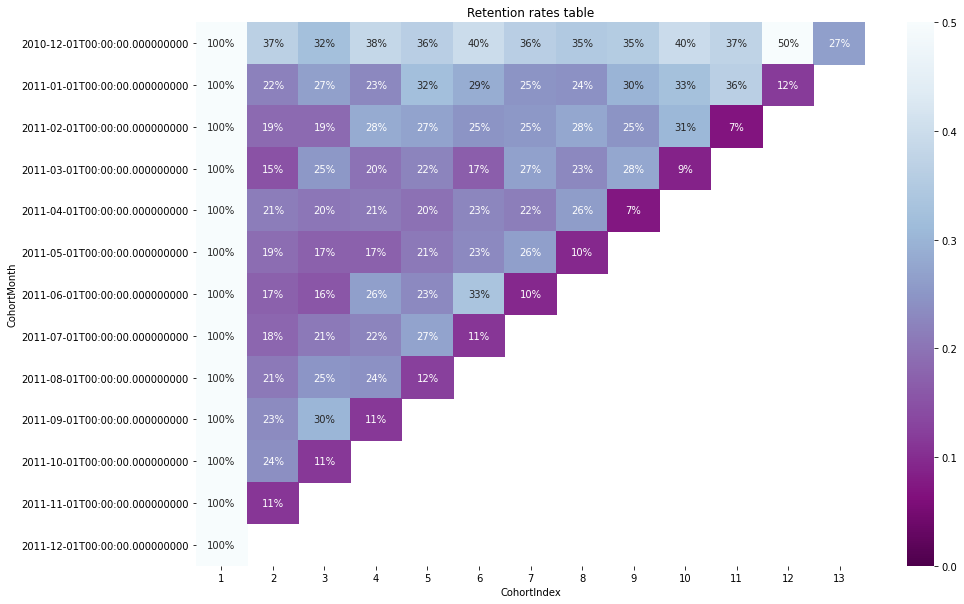

In [40]:
plt.figure(figsize=(15, 10))
plt.title('Retention rates table')
sns.heatmap(data=retentionRateData,annot = True,fmt = '.0%',vmin = 0.0,vmax = 0.5,cmap="BuPu_r")
plt.show()

#### Build Cohort chart for Average Quantity

In [41]:
groupingAvgData = retailDF.groupby(['CohortMonth', 'CohortIndex'])
cohortData = groupingAvgData['Quantity'].mean()
cohortData = cohortData.reset_index()
averageQuantity = cohortData.pivot(index='CohortMonth',columns='CohortIndex',values='Quantity')
averageQuantity.round(1)
averageQuantity.index = averageQuantity.index.date

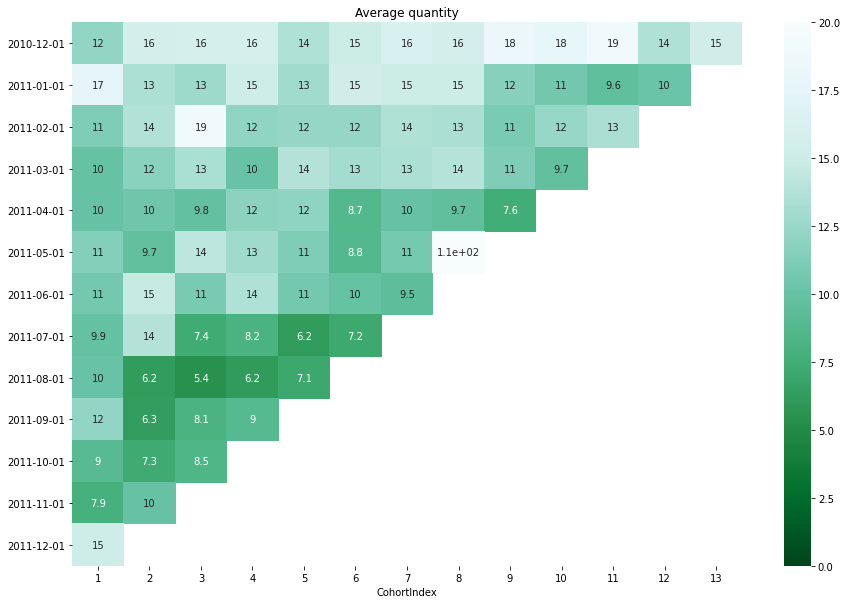

In [42]:
plt.figure(figsize=(15, 10))
plt.title('Average quantity')
sns.heatmap(data=averageQuantity,annot = True,vmin = 0.0,vmax =20,cmap="BuGn_r")
plt.show()

### Project Task: Week 2
#### Data Modeling:

#### Recency, Frequency and Monetary Value metrics, calculation 

In [43]:
retailDF['TotalSum'] = retailDF['UnitPrice']* retailDF['Quantity']

In [46]:
print('Minimum Invoice Date:',retailDF.InvoiceDate.dt.date.min())

Minimum Invoice Date: 2010-12-01


In [47]:
print('Maximum Invoice Date:',
       retailDF.InvoiceDate.dt.date.max())

Maximum Invoice Date: 2011-12-09


In [49]:
retailDF.head(n=5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSum,InvoiceMonth,CohortMonth,CohortIndex
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,2010-12-01,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,2010-12-01,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01,1


In [51]:
snapshotDate = retailDF['InvoiceDate'].max() + dt.timedelta(days=1)
snapshotDate

Timestamp('2011-12-10 12:50:00')

#### Building RFM metrics

In [52]:
rfm = retailDF.groupby(['CustomerID']).agg({'InvoiceDate': lambda x : (snapshotDate - x.max()).days,
                                      'InvoiceNo':'count','TotalSum': 'sum'})

#### Rename the columns

In [53]:
rfm.rename(columns={'InvoiceDate':'Recency','InvoiceNo':'Frequency','TotalSum':'MonetaryValue'}
           ,inplace= True)

In [54]:
rfm.sample(n=5)

,Recency,Frequency,MonetaryValue
CustomerID,,,
13159.0,9,120,1429.35
15019.0,267,66,252.81
13488.0,17,422,8968.31
12412.0,75,61,1226.88
15130.0,170,22,330.11


#### Building RFM Segements and RFM Score

In [55]:
rLabels =range(4,0,-1)
fLabels=range(1,5)
mLabels=range(1,5)

In [56]:
rQuartiles = pd.qcut(rfm['Recency'], q=4, labels = rLabels)
fQuartiles = pd.qcut(rfm['Frequency'],q=4, labels = fLabels)
mQuartiles = pd.qcut(rfm['MonetaryValue'],q=4,labels = mLabels)

In [57]:
rfm = rfm.assign(R=rQuartiles,F=fQuartiles,M=mQuartiles)

In [58]:
def addRfm(data): 
    return str(data['R']) + str(data['F']) + str(data['M'])

In [59]:
rfm['RFMSegment'] = rfm.apply(addRfm,axis=1)

In [60]:
rfm['RFMScore'] = rfm[['R','F','M']].sum(axis=1)

In [61]:
rfm.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFMSegment,RFMScore
CustomerID,,,,,,,,
12346.0,326,1,77183.60,1,1,4,114,6.0
12347.0,2,182,4310.00,4,4,4,444,12.0
12348.0,75,31,1797.24,2,2,4,224,8.0
12349.0,19,73,1757.55,3,3,4,334,10.0
12350.0,310,17,334.40,1,1,2,112,4.0


In [62]:
rfm.sample(n=5)

,Recency,Frequency,MonetaryValue,R,F,M,RFMSegment,RFMScore
CustomerID,,,,,,,,
16913.0,290,8,113.44,1,1,1,111,3.0
17672.0,50,110,3178.17,3,4,4,344,11.0
15535.0,173,72,502.90,1,3,2,132,6.0
14457.0,311,4,113.64,1,1,1,111,3.0
12965.0,89,108,769.81,2,4,3,243,9.0


In [63]:
#### Latest RFM Segments Analysis
rfm.groupby(['RFMSegment']).size().sort_values(ascending=False)[:5]

RFMSegment
444    450
111    381
344    217
122    206
211    179
dtype: int64

In [64]:
#filter
rfm[rfm['RFMSegment']=='111'].head()

,Recency,Frequency,MonetaryValue,R,F,M,RFMSegment,RFMScore
CustomerID,,,,,,,,
12353.0,204,4,89.00,1,1,1,111,3.0
12361.0,287,10,189.90,1,1,1,111,3.0
12401.0,303,5,84.30,1,1,1,111,3.0
12402.0,323,11,225.60,1,1,1,111,3.0
12441.0,367,11,173.55,1,1,1,111,3.0


In [65]:
#filter
rfm[rfm['RFMSegment']=='122'].head()

,Recency,Frequency,MonetaryValue,R,F,M,RFMSegment,RFMScore
CustomerID,,,,,,,,
12365.0,291,22,641.38,1,2,2,122,5.0
12414.0,217,18,562.41,1,2,2,122,5.0
12426.0,195,30,582.73,1,2,2,122,5.0
12447.0,243,26,476.49,1,2,2,122,5.0
12493.0,166,22,433.74,1,2,2,122,5.0


In [66]:
rfm.groupby('RFMScore').agg({'Recency': 'mean','Frequency': 'mean',
                             'MonetaryValue': ['mean', 'count'] }).round(1)

Recency Frequency MonetaryValue      
            mean      mean          mean count
RFMScore                                      
3.0        260.7       8.2         157.4   381
4.0        177.2      13.6         240.0   388
5.0        152.9      21.2         366.6   518
6.0         95.9      27.9         820.8   457
7.0         79.6      38.0         758.1   463
8.0         64.1      56.0         987.3   454
9.0         45.9      78.7        1795.1   414
10.0        32.4     110.5        2056.4   426
11.0        21.3     186.9        4062.0   387
12.0         7.2     367.8        9285.9   450

#### RFM Score to groupby segments as Gold, Silver and Bronze Segments for three ratings:

In [68]:
def segmentsData(df):
    if df['RFMScore'] > 9 :
        return 'Gold'
    elif (df['RFMScore'] > 5) and (df['RFMScore'] <= 9 ):
        return 'Sliver'
    else:  
        return 'Bronze'

rfm['GeneralSegment'] = rfm.apply(segmentsData,axis=1)

rfm.groupby('GeneralSegment').agg({'Recency':'mean','Frequency':'mean',
                                    'MonetaryValue':['mean','count']}).round(1)


Recency Frequency MonetaryValue      
                  mean      mean          mean count
GeneralSegment                                      
Bronze           192.2      15.1         266.5  1287
Gold              20.1     225.6        5246.8  1263
Sliver            72.0      49.4        1072.4  1788

### Project Task: Week 3
#### Data Modeling:

In [69]:
rfmDesc = rfm[['Recency','Frequency','MonetaryValue']]
rfmDesc.describe()

,Recency,Frequency,MonetaryValue
count,4338.000000,4338.000000,4338.000000
mean,92.536422,90.523744,2048.688081
std,100.014169,225.506968,8985.230220
min,1.000000,1.000000,3.750000
25%,18.000000,17.000000,306.482500
50%,51.000000,41.000000,668.570000
75%,142.000000,98.000000,1660.597500
max,374.000000,7676.000000,280206.020000


1. K-Means need to be have symmentric values for mean and variance 
2. But above mean and variance not equal one

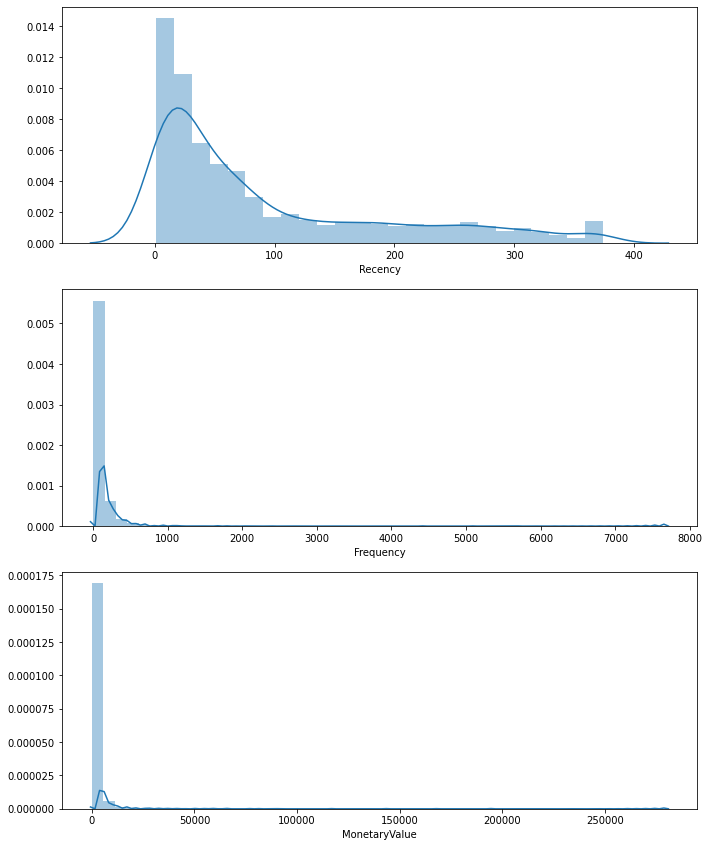

In [70]:
f,ax = plt.subplots(figsize=(10, 12))
plt.subplot(3, 1, 1); sns.distplot(rfm.Recency, label = 'Recency')
plt.subplot(3, 1, 2); sns.distplot(rfm.Frequency, label = 'Frequency')
plt.subplot(3, 1, 3); sns.distplot(rfm.MonetaryValue, label = 'Monetary Value')
plt.style.use('fivethirtyeight')
plt.tight_layout()
plt.show()

- Above, plot shows unsymmentric distribution of variaables; Soluton will be Logarithmic transformation

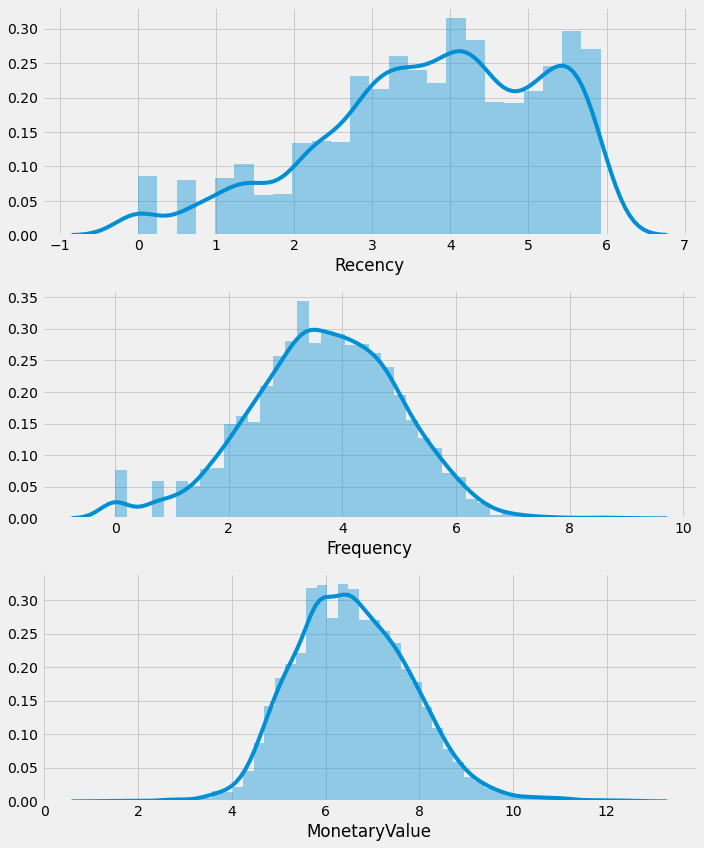

In [71]:
rfmLog = rfm[['Recency', 'Frequency', 'MonetaryValue']].apply(np.log, axis = 1).round(3)

f,ax = plt.subplots(figsize=(10, 12))
plt.subplot(3, 1, 1); sns.distplot(rfmLog.Recency, label = 'Recency')
plt.subplot(3, 1, 2); sns.distplot(rfmLog.Frequency, label = 'Frequency')
plt.subplot(3, 1, 3); sns.distplot(rfmLog.MonetaryValue, label = 'Monetary Value')
plt.style.use('fivethirtyeight')
plt.tight_layout()
plt.show()

#### Implementation of K-Means Clustering

#### 1. Data Preprocessing  

In [72]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(rfmLog)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [74]:
rfmNormalized= scaler.transform(rfmLog)

#### Choosing Number of clusters

In [75]:
from sklearn.cluster import KMeans

In [77]:
ks = range(1,8)
inertias=[]
for k in ks :
    # Create a KMeans clusters
    kc = KMeans(n_clusters=k,random_state=1)
    kc.fit(rfmNormalized)
    inertias.append(kc.inertia_)

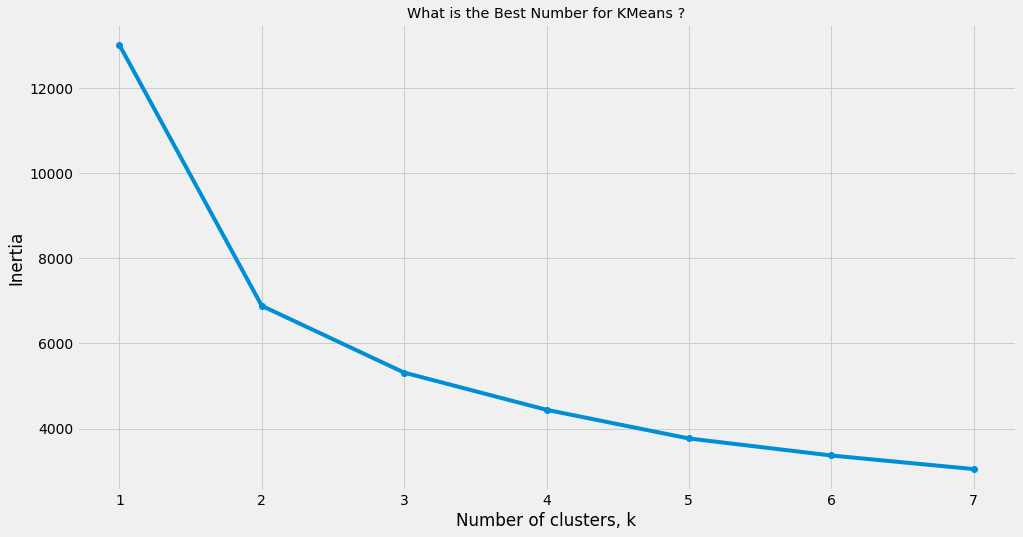

In [78]:
f, ax = plt.subplots(figsize=(15, 8))
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.style.use('ggplot')
plt.title('What is the Best Number for KMeans ?')
plt.show()

In [80]:
kc = KMeans(n_clusters= 3, random_state=1)
kc.fit(rfmNormalized)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [81]:
clusterLabels = kc.labels_

In [83]:
rfmDesc_k3 = rfmDesc.assign(K_Cluster = clusterLabels)

In [84]:
rfmDesc_k3.groupby('K_Cluster').agg({'Recency': 'mean','Frequency': 'mean',
                                         'MonetaryValue': ['mean', 'count'],}).round(0)

Recency Frequency MonetaryValue      
             mean      mean          mean count
K_Cluster                                      
0            13.0     260.0        6554.0   957
1            69.0      65.0        1167.0  1858
2           171.0      15.0         293.0  1523

In [86]:
rfmNormalized = pd.DataFrame(rfmNormalized,index=rfmDesc.index,columns=rfmDesc.columns)
rfmNormalized['K_Cluster'] = kc.labels_
rfmNormalized['GeneralSegment'] = rfm['GeneralSegment']
rfmNormalized.reset_index(inplace = True)

In [87]:
rfmSqueezeData = pd.melt(rfmNormalized,id_vars=['CustomerID','GeneralSegment','K_Cluster'],value_vars=['Recency', 'Frequency', 'MonetaryValue'],
var_name='Metric',value_name='Value')
rfmSqueezeData.head()

,CustomerID,GeneralSegment,K_Cluster,Metric,Value
0,12346.0,Sliver,1,Recency,1.409982
1,12347.0,Gold,0,Recency,-2.146578
2,12348.0,Sliver,1,Recency,0.383648
3,12349.0,Gold,1,Recency,-0.574961
4,12350.0,Bronze,2,Recency,1.375072


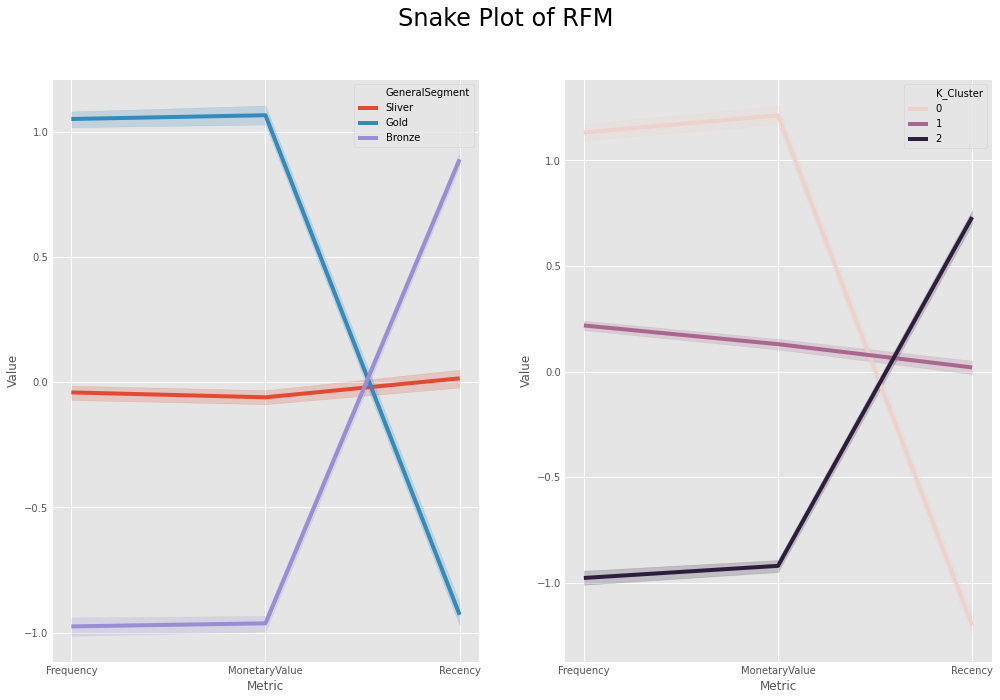

In [88]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 10))
sns.lineplot(x = 'Metric', y = 'Value', hue = 'GeneralSegment', data = rfmSqueezeData,ax=ax1)

# a snake plot with K-Means
sns.lineplot(x = 'Metric', y = 'Value', hue = 'K_Cluster', data = rfmSqueezeData,ax=ax2)

plt.suptitle("Snake Plot of RFM",fontsize=24) #make title fontsize subtitle 
plt.show()

#### segment relative to the total population

In [89]:
clusterAvg = rfmDesc_k3.groupby(['K_Cluster']).mean()
populationAvg = rfmDesc.mean()
relativeImp = clusterAvg / populationAvg - 1
relativeImp.round(4)

,Recency,Frequency,MonetaryValue
K_Cluster,,,
0,-0.8584,1.8692,2.1991
1,-0.2547,-0.2780,-0.4304
2,0.8501,-0.8353,-0.8568


#### calculating the proportional gap with total mean

In [90]:
totalAvg = rfm.iloc[:, 0:3].mean()
clusterAvg = rfm.groupby('GeneralSegment').mean().iloc[:, 0:3]
propRFM = clusterAvg/totalAvg - 1
propRFM.round(4)

,Recency,Frequency,MonetaryValue
GeneralSegment,,,
Bronze,1.0766,-0.8336,-0.8699
Gold,-0.7833,1.4924,1.5610
Sliver,-0.2217,-0.4541,-0.4765


#### Heatmap with RFM

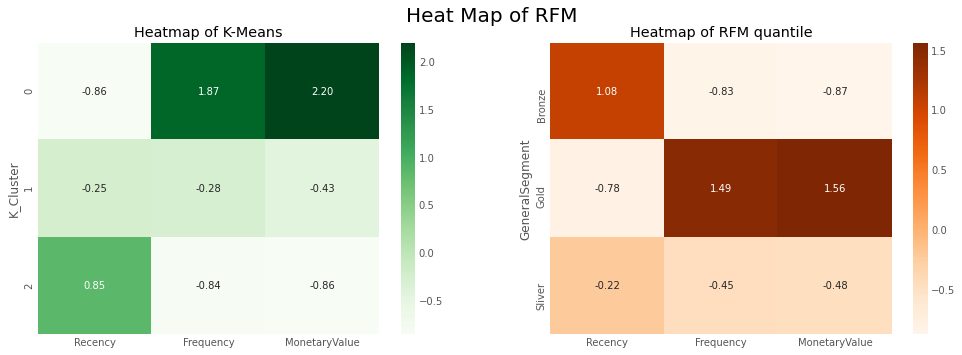

In [94]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 5))
sns.heatmap(data=relativeImp, annot=True, fmt='.2f', cmap='Greens',ax=ax1)
ax1.set(title = "Heatmap of K-Means")

sns.heatmap(propRFM, cmap= 'Oranges', fmt= '.2f', annot = True,ax=ax2)
ax2.set(title = "Heatmap of RFM quantile")

plt.suptitle("Heat Map of RFM",fontsize=20) 

plt.show()


#### Conclusion: 
Here we came to know that how to get RFM values from customer purchase data, and we have the two kinds of segmentation with RFM quantiles and K-Means clustering methods.



### Project Task: Week 4
#### Data Reporting:

##### Data Visualization will be provided in the Tableau Visualization